<a href="https://colab.research.google.com/github/ritwiks9635/Data-Science-Project/blob/main/Students_Academic_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**👩‍🎓Students'👨‍🎓 Academic 🎓Performance**

[DATASET](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset)

In [ ]:
!pip install catboost

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

##**About this Dataset**

- **Student ID:** A unique identifier assigned to each student (1001 to 3392).

###**Demographic Details**

- **Age:** The age of the students ranges from 15 to 18 years.

- **Gender:** Gender of the students, where 0 represents Male and 1 represents Female.

- **Ethnicity:** The ethnicity of the students, coded as follows:
-- 0: Caucasian
-- 1: African American
-- 2: Asian
-- 3: Other

- **ParentalEducation:** The education level of the parents, coded as follows:
-- 0: None
-- 1: High School
-- 2: Some College
-- 3: Bachelor's
-- 4: Higher

### **Study Habits**
- **StudyTimeWeekly:** Weekly study time in hours, ranging from 0 to 20.
- **Absences:** Number of absences during the school year, ranging from 0 to 30.
- **Tutoring:** Tutoring status, where 0 indicates No and 1 indicates Yes.

### **Parental Involvement**
- **ParentalSupport:** The level of parental support, coded as follows:
-- 0: None
-- 1: Low
-- 2: Moderate
-- 3: High
-- 4: Very High

### **Extracurricular Activities**
- **Extracurricular:** Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- **Sports:** Participation in sports, where 0 indicates No and 1 indicates Yes.
- **Music:** Participation in music activities, where 0 indicates No and 1 indicates Yes.
- **Volunteering:** Participation in volunteering, where 0 indicates No and 1 indicates Yes.

### **Academic Performance**
- **GPA:** Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

###**Target Variable: Grade Class**
- **GradeClass:** Classification of students' grades based on GPA:
-- 0: 'A' (GPA >= 3.5)
--  1: 'B' (3.0 <= GPA < 3.5)
-- 2: 'C' (2.5 <= GPA < 3.0)
-- 3: 'D' (2.0 <= GPA < 2.5)
-- 4: 'F' (GPA < 2.0)

In [5]:
df_path = "/content/Student_performance_data _.csv"
df = pd.read_csv(df_path)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [8]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

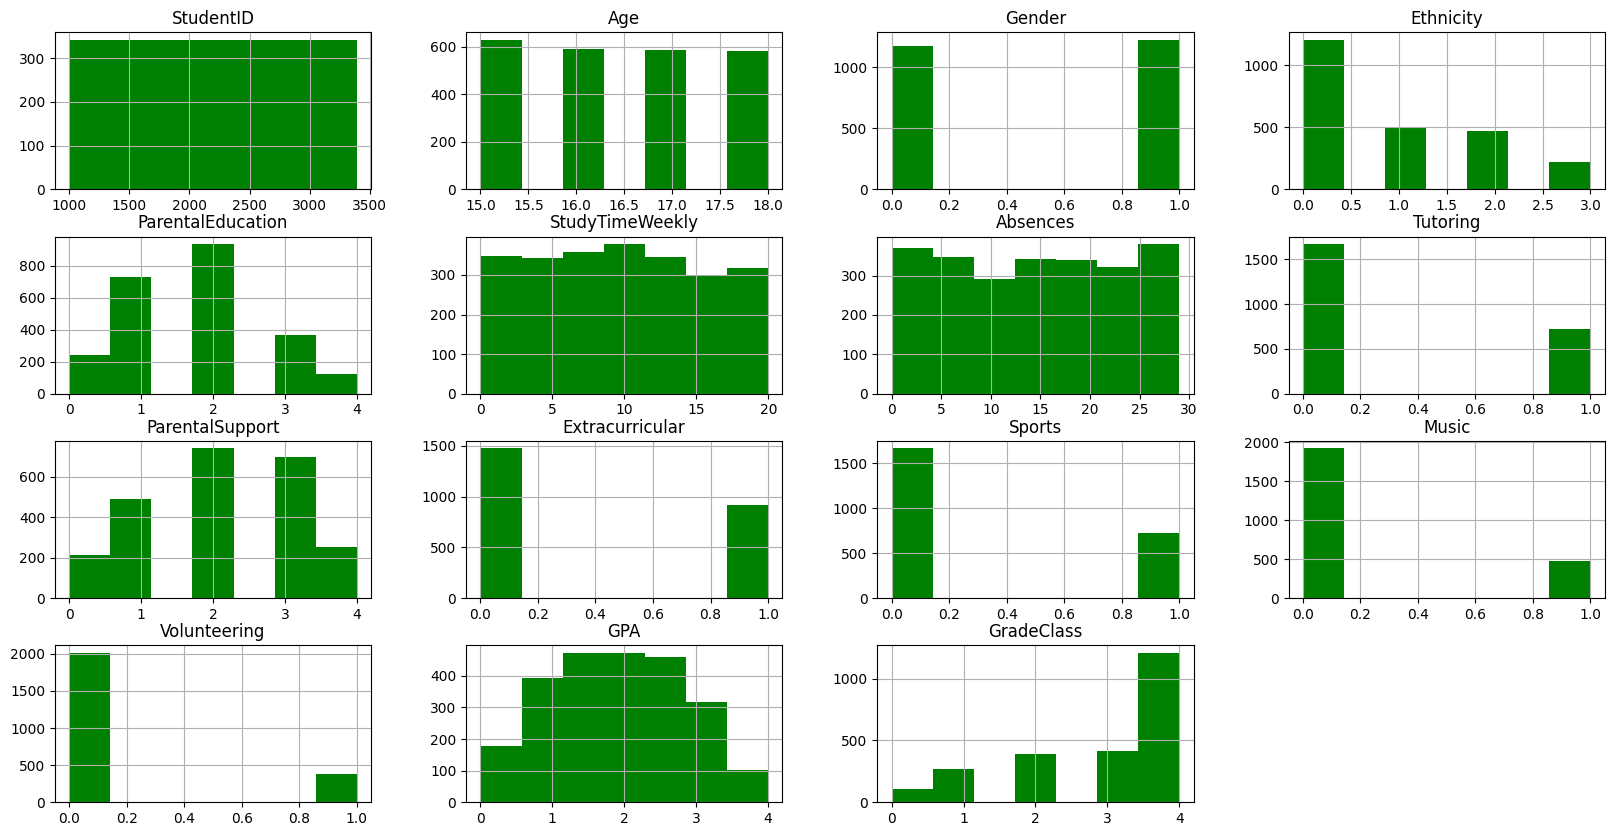

In [9]:
df.hist(figsize = (20, 10), bins = 7, color = "green")

- StudentID has no distribution and logically would have no effect on Grade
- There are only 4 ages in this dataset, which strangely makes age a categorical feature
- There are only 4 ethnicity variables in this dataset
- There are a lot of low-scoring students in this dataset (a majority of 4s - Fs in GradeClass)

## **Data Analysis**

In [10]:
columns = list(df.columns)
categorical_cols = []
numerical_cols = []

for i in columns:
    if len(df[i].unique()) > 5:
        numerical_cols.append(i)
    else :
        categorical_cols.append(i)


print("Numerical Features :: ", numerical_cols)
print("Categorical Features :: ", categorical_cols)

Numerical Features ::  ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
Categorical Features ::  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [11]:
numerical_cols = numerical_cols[1:]
df[numerical_cols] = df[numerical_cols].astype("float64")

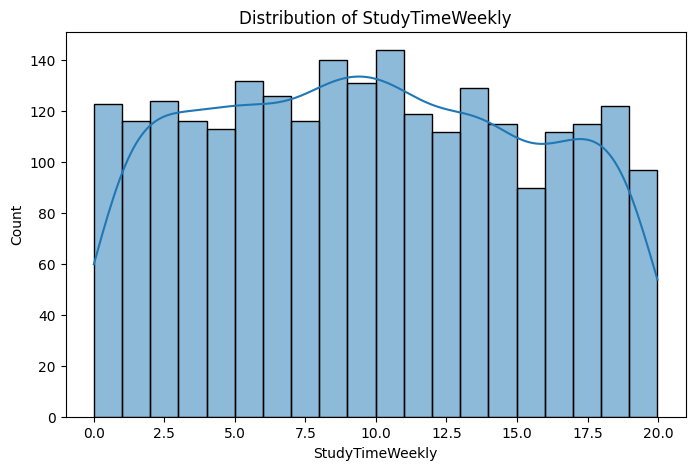

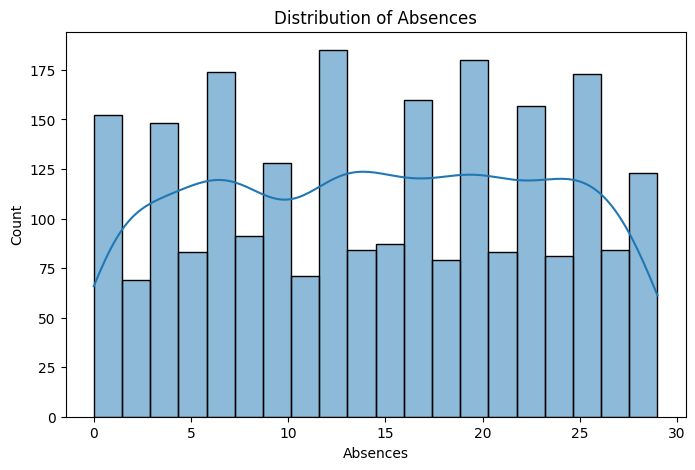

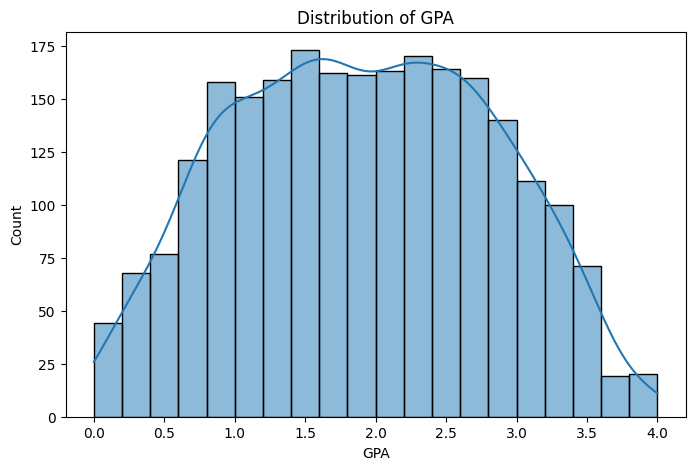

In [12]:
for column in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

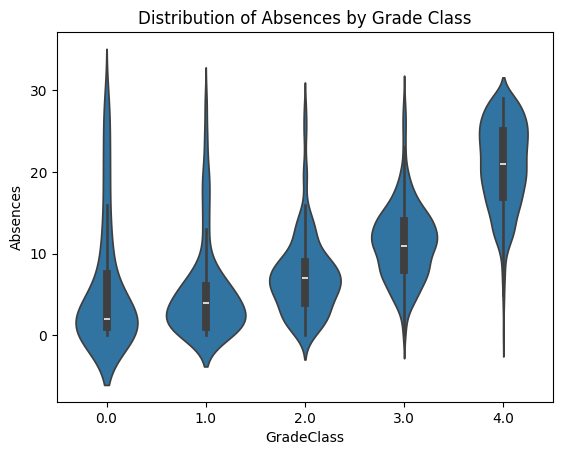

In [13]:
sns.violinplot(data=df, x='GradeClass', y='Absences')
plt.title(f'Distribution of Absences by Grade Class')
plt.show()

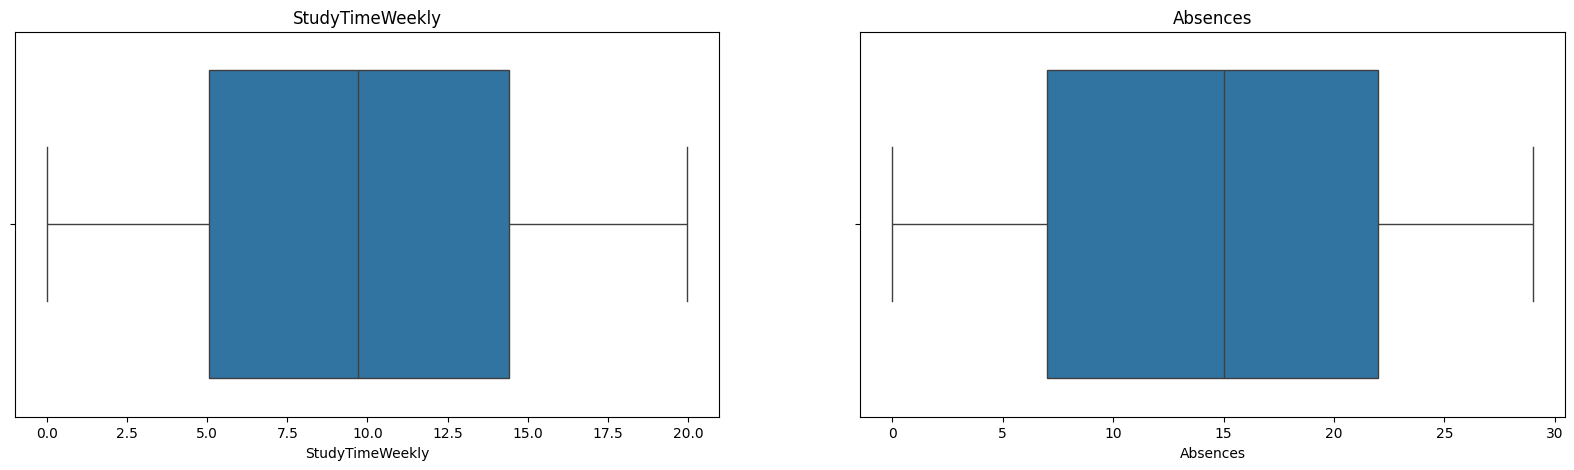

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

for idx in range(2):
    sns.boxplot(ax=ax[idx], x=df[numerical_cols[idx]])
    ax[idx].set_title(numerical_cols[idx])

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

LE = LabelEncoder()

df = df.copy()

for column in categorical_cols:
    df[column] = LE.fit_transform(df[column])


sc = StandardScaler()
df[numerical_cols] = sc.fit_transform(df[numerical_cols])

In [16]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,2,1,0,2,1.780336,-0.890822,1,2,0,0,1,0,1.118086,2
1,1002,3,0,0,1,0.997376,-1.717694,0,1,0,0,0,0,1.242374,1
2,1003,0,0,2,3,-0.984045,1.353542,0,2,0,0,0,0,-1.960277,4
3,1004,2,1,0,3,0.045445,-0.063951,0,3,1,0,0,0,0.161790,3
4,1005,2,1,0,2,-0.902311,0.290422,1,3,0,0,0,0,-0.675573,4


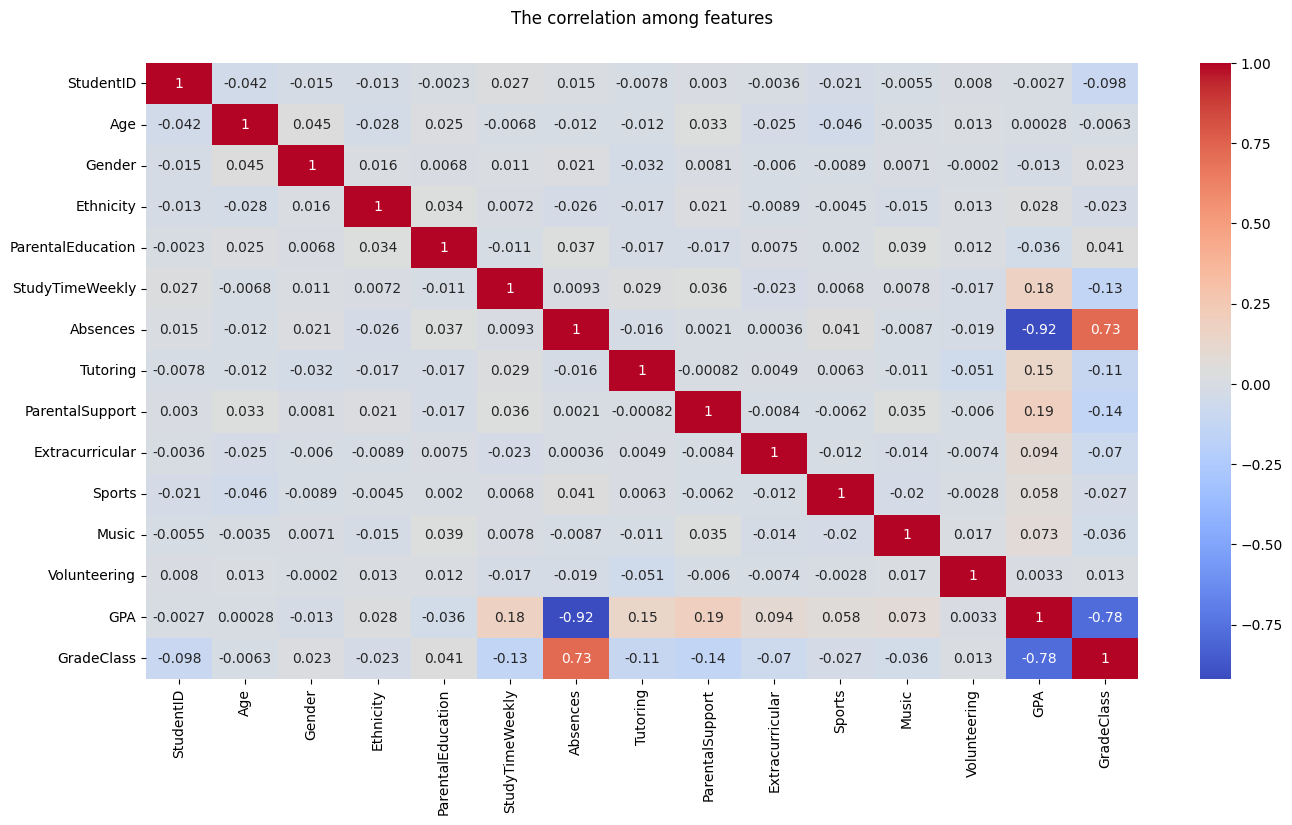

In [17]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()


Note: I'm also dropping some features that I don't want to add noise to the model here:
- GradeClass <- our target feature
- StudentID <- studentID is not logically a useful predictor of a student's grade
- Age <- I thought about this for a while, and I do not believe age should be used as a predictor for this data. The feature would not generalize well to future predictions on unseen data unless the age range is the same (15-18). I believe that removing age as a predictor creates a more robust model that we can apply to future student performance analysis in any academic setting (i.e. elementary school or university).
- GPA <- this would add unnecessary noise to the model and is not logical for future predictions

##**Find Most Important Features**

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["GradeClass", "StudentID", "Age", "GPA"], axis = 1)
y = df["GradeClass"]

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

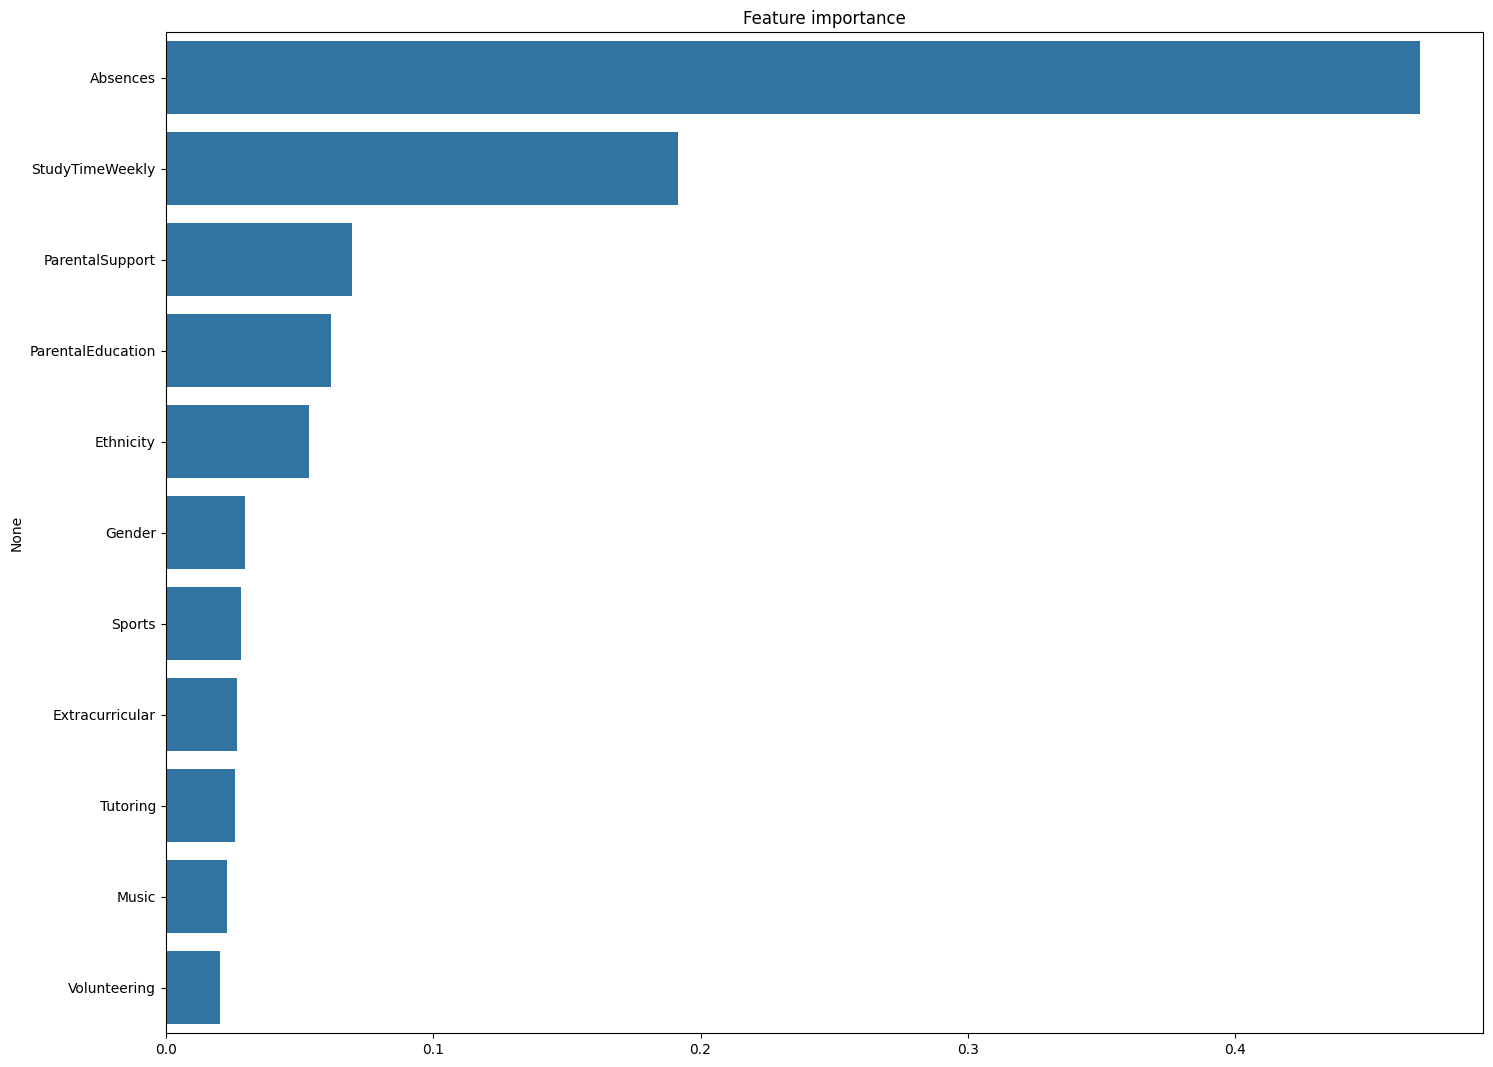

In [20]:
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

##**Model Build**

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv

In [22]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.73
K-Nearest Neighbors accuracy: 0.65
Support Vector Machine accuracy: 0.75
Decision Tree accuracy: 0.57
Random Forest accuracy: 0.70
Gradient Boosting accuracy: 0.69
AdaBoost accuracy: 0.66
Gaussian Naive Bayes accuracy: 0.68
XGBoost accuracy: 0.67
CatBoost accuracy: 0.70


In [23]:
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}")

The best model is: Support Vector Machine with an accuracy of 0.75


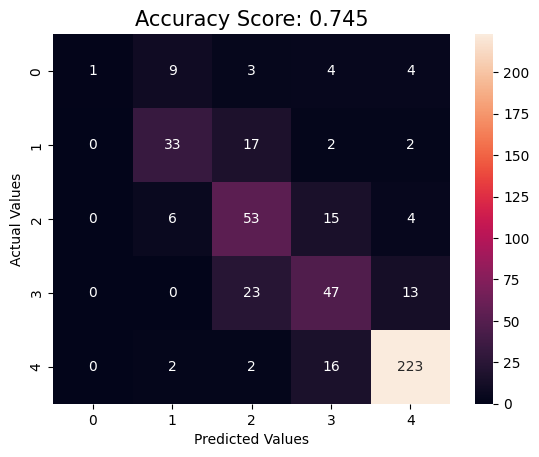

In [24]:
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

##**Hyperparameter Tuning**

In [29]:
# Define grid
grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.1, 0.01, 0.001],
    'degree': [2, 3, 4],
    'class_weight': ['balanced', None]
}
random_search = RandomizedSearchCV(estimator=SVC(), param_distributions=grid, n_iter=10, scoring='accuracy', cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % random_search.best_score_)
print('Best Hyperparameters: %s' % random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.7422880811449974
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'degree': 4, 'class_weight': None, 'C': 100}


In [30]:
result = SVC(kernel = "linear", gamma = 0.001, degree = 4, C = 100)
result.fit(X_train, y_train)

SVC(C=100, degree=4, gamma=0.001, kernel='linear')

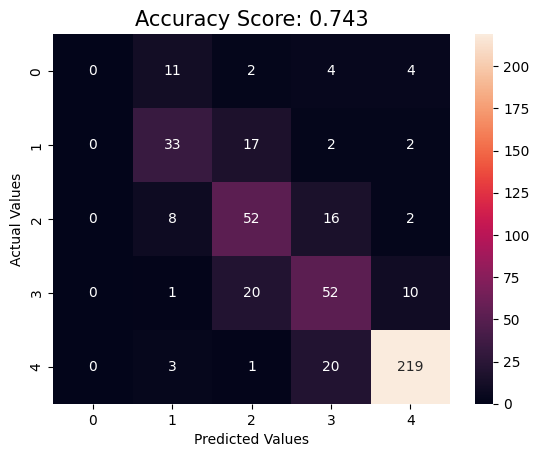

In [31]:
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()